### The jupyter notebook is to get sample data (1000 rows) from AirBnB with crime data and point of interest for our analysis. We are not able to upload AirBnB and Crime data to GitHub due to the file sizes. Before running the jupter notebook, please download the AirBnB and Crime data from  http://insideairbnb.com/get-the-data.html and https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/63jg-8b9z
### Please be aware. There is a doulbe-loop to calculate crime counts (1000 rows x 220343 rows) in this jupyter notebook. To run it may take 3-4 hours.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
import requests
import json
from api_keys import g_key

#pip install geopy
#install geopy to calculate crime count nearby each sample AirBnB property
from geopy import distance

In [2]:
#The Los Angeles AirBnB data(listings.csv) is from http://insideairbnb.com/get-the-data.html
AirBnB_data = pd.read_csv("listings.csv",low_memory=False)
#The Los Angeles crime data(Crime_Data_from_2010_to_Present.csv) is from https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/63jg-8b9z
crime_df = pd.read_csv("Crime_Data_from_2010_to_Present.csv")

In [4]:
#convert 'Dta Rptd' data to year and add a new 'year' column
crime_df['year']=crime_df['Date Rptd'].str.extract('(\d\d\d\d)', expand=True)
#drop other years data except 2019 (only keep year 2019 data)
crime_2019 = crime_df.loc[crime_df['year']=='2019']
lats = crime_2019['LAT']
lngs = crime_2019['LON']
locations = zip(lats,lngs)
cities = []

# use lat and lon to find city name and add a new 'city' column
for location in locations:
    city = citipy.nearest_city(location[0],location[1]).city_name
    cities.append(city)

crime_2019["city"]=cities

#count crime number for each city
crime_counts_df = pd.DataFrame(crime_2019['city'].value_counts())
crime_counts_df = crime_counts_df.rename(columns={"city":"crime"})
crime_counts_df['city'] = crime_counts_df.index.tolist()
crime_counts_df = crime_counts_df[['city','crime']]
crime_counts_df['year'] = 2019
crime_counts_df = crime_counts_df.reset_index(drop=True)
crime_counts_df['city'] = [str.title(city) for city in crime_counts_df['city']]
crime_counts_df

/Users/kazuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,crime,year
0,Los Angeles,47879,2019
1,San Fernando,30070,2019
2,West Hollywood,27938,2019
3,Calabasas,18324,2019
4,Westmont,16008,2019
5,Culver City,10911,2019
6,Beverly Hills,8874,2019
7,Burbank,8775,2019
8,Inglewood,7980,2019
9,Santa Monica,7166,2019


In [6]:
#total number of crimes in Los Angeles in 2019
len(crime_2019['DR_NO'])

220343

In [4]:
#combine AirBnB data and crime counts data
merged_data = pd.merge(AirBnB_data, crime_counts_df, how="left", on="city")
merged_data

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,crime,year
0,109,https://www.airbnb.com/rooms/109,20191205175409,2019-12-06,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,...,strict_14_with_grace_period,t,f,1,1,0,0,0.02,10911.0,2019.0
1,344,https://www.airbnb.com/rooms/344,20191205175409,2019-12-06,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,...,flexible,f,f,1,1,0,0,0.19,8775.0,2019.0
2,2708,https://www.airbnb.com/rooms/2708,20191205175409,2019-12-06,Mirrored Mini-Suite with Fireplace - W. Hollywood,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,...,strict_14_with_grace_period,f,f,2,0,2,0,0.33,47879.0,2019.0
3,2732,https://www.airbnb.com/rooms/2732,20191205175409,2019-12-06,Zen Life at the Beach,NaN,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,none,NaN,...,strict_14_with_grace_period,f,f,2,1,1,0,0.19,7166.0,2019.0
4,2864,https://www.airbnb.com/rooms/2864,20191205175409,2019-12-07,*Upscale Professional Home with Beautiful Studio*,Centrally located.... Furnished with 42 inch S...,The space is furnished with Thomasville furnit...,Centrally located.... Furnished with 42 inch S...,none,What makes the neighborhood unique is that the...,...,strict_14_with_grace_period,f,f,1,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40120,40599772,https://www.airbnb.com/rooms/40599772,20191205175409,2019-12-06,Bright Spacious two bedroom apartment by the b...,Brand new spacious apartment! this two bedroom...,"the apartment is more than 1200sqft, has two b...",Brand new spacious apartment! this two bedroom...,none,NaN,...,strict_14_with_grace_period,f,f,1,1,0,0,NaN,NaN,NaN
40121,40599853,https://www.airbnb.com/rooms/40599853,20191205175409,2019-12-06,Studio near the beach,Beautiful modern studio apartment located in M...,Full kitchen equipped for all your cooking nee...,Beautiful modern studio apartment located in M...,none,"Venice beach, Venice canals, the Santa Monica ...",...,moderate,f,f,2,2,0,0,NaN,NaN,NaN
40122,40601503,https://www.airbnb.com/rooms/40601503,20191205175409,2019-12-06,Cozy Studio maximum 4 person near many attract...,NaN,NaN,NaN,none,NaN,...,flexible,f,f,3,3,0,0,NaN,NaN,NaN
40123,40601789,https://www.airbnb.com/rooms/40601789,20191205175409,2019-12-06,Hollywood Classic Bungalow,Heart of Hollywood Bungalow central to the bes...,Heart of Hollywood Bungalow central to the bes...,Heart of Hollywood Bungalow central to the bes...,none,There is an amazing pilates studio right in th...,...,moderate,f,f,3,3,0,0,NaN,47879.0,2019.0


In [4]:
#drop unnecessary columns
merged_data=merged_data[['id','host_id','host_response_time','host_response_rate','host_is_superhost','host_listings_count','street','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','city','state','zipcode','market','smart_location','country_code','country','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','square_feet','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','calendar_updated','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_location','reviews_per_month','crime','year']]
merged_data

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month,crime,year
0,109,521,NaN,NaN,f,1.0,"Culver City, CA, United States",Culver City,Culver City,Other Cities,...,248,2,80.0,10.0,10.0,6.0,10.0,0.02,10911.0,2019.0
1,344,767,within a few hours,100%,f,1.0,"Burbank, CA, United States",Burbank,Burbank,Other Cities,...,62,8,97.0,10.0,10.0,10.0,10.0,0.19,8775.0,2019.0
2,2708,3008,within a few hours,100%,t,2.0,"Los Angeles, CA, United States",Hollywood,Hollywood,City of Los Angeles,...,252,22,98.0,10.0,10.0,10.0,10.0,0.33,47879.0,2019.0
3,2732,3041,within a few hours,100%,t,2.0,"Santa Monica, CA, United States",Santa Monica,Santa Monica,Other Cities,...,344,20,94.0,9.0,9.0,9.0,10.0,0.19,7166.0,2019.0
4,2864,3207,NaN,NaN,f,1.0,"Bellflower, CA, United States",Bellflower,Bellflower,Other Cities,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40120,40599772,314561523,NaN,NaN,f,0.0,"Marina del Rey, CA, United States",Marina Del Rey,Marina del Rey,Unincorporated Areas,...,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40121,40599853,21414814,NaN,NaN,f,0.0,"Marina del Rey, CA, United States",Marina Del Rey,Marina del Rey,Unincorporated Areas,...,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40122,40601503,301336206,a few days or more,40%,f,6.0,"Temple City, CA, United States",Temple City,Temple City,Other Cities,...,57,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40123,40601789,322037,within an hour,100%,f,3.0,"Los Angeles, CA, United States",Hollywood,Hollywood,City of Los Angeles,...,178,0,NaN,NaN,NaN,NaN,NaN,NaN,47879.0,2019.0


In [5]:
merged_data=merged_data[['id','host_id','host_response_time','host_response_rate','host_is_superhost','host_listings_count','street','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','city','state','zipcode','market','smart_location','country_code','country','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','square_feet','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','calendar_updated','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_location','reviews_per_month','crime','year']]
#drop rows that do not relate to LA crimes and have no review scores rating
merged_data=merged_data.dropna(how='all',subset=['crime'])
merged_data=merged_data.dropna(how='all',subset=['review_scores_rating'])
merged_data

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month,crime,year
0,109,521,NaN,NaN,f,1.0,"Culver City, CA, United States",Culver City,Culver City,Other Cities,...,248,2,80.0,10.0,10.0,6.0,10.0,0.02,10911.0,2019.0
1,344,767,within a few hours,100%,f,1.0,"Burbank, CA, United States",Burbank,Burbank,Other Cities,...,62,8,97.0,10.0,10.0,10.0,10.0,0.19,8775.0,2019.0
2,2708,3008,within a few hours,100%,t,2.0,"Los Angeles, CA, United States",Hollywood,Hollywood,City of Los Angeles,...,252,22,98.0,10.0,10.0,10.0,10.0,0.33,47879.0,2019.0
3,2732,3041,within a few hours,100%,t,2.0,"Santa Monica, CA, United States",Santa Monica,Santa Monica,Other Cities,...,344,20,94.0,9.0,9.0,9.0,10.0,0.19,7166.0,2019.0
5,5728,9171,within an hour,100%,t,8.0,"Los Angeles, CA, United States",Del Rey,Del Rey,City of Los Angeles,...,326,305,96.0,10.0,10.0,10.0,10.0,2.41,47879.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39735,40419884,262583834,within an hour,100%,f,0.0,"Los Angeles, CA, United States",Hollywood Hills,Hollywood Hills,City of Los Angeles,...,323,1,80.0,8.0,10.0,10.0,10.0,1.00,47879.0,2019.0
39770,40432719,159390555,within an hour,100%,f,2.0,"Los Angeles, CA, United States",Hollywood,Hollywood,City of Los Angeles,...,17,1,100.0,10.0,10.0,10.0,10.0,1.00,47879.0,2019.0
39803,40451735,774117,within an hour,99%,t,16.0,"Long Beach, CA, United States",Long Beach,Long Beach,Other Cities,...,8,3,100.0,10.0,10.0,10.0,10.0,3.00,148.0,2019.0
39951,40515096,260383802,within an hour,100%,f,1.0,"Los Angeles, CA, United States",Hollywood,Hollywood,City of Los Angeles,...,354,1,100.0,10.0,10.0,10.0,10.0,1.00,47879.0,2019.0


In [6]:
#remove dollar signs and commas in "price" column and convert the price data to float type
merged_data.loc[:,'price'] = merged_data['price'].str.replace('$','')
merged_data.loc[:,'price'] = merged_data['price'].str.replace(',','')
merged_data.loc[:,'price'] = merged_data['price'].astype(float)
merged_data['price']

0        122.0
1        168.0
2         79.0
3        140.0
5         75.0
         ...  
39735    399.0
39770    110.0
39803     50.0
39951    249.0
40095     45.0
Name: price, Length: 24618, dtype: float64

24618


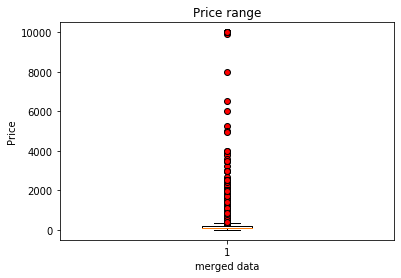

In [7]:
#create the boxplot graph to check the outliers in the price column
price_data = merged_data['price']
print(len(price_data))

marker = dict(markerfacecolor='r', marker='o')
plt.boxplot(price_data, flierprops=marker)

plt.title('Price range')
plt.xlabel('merged data')
plt.ylabel('Price')
plt.savefig('price_range_with_outliers.png')
plt.show()

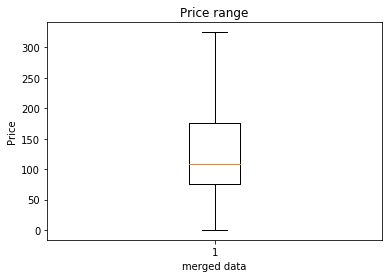

In [8]:
#show price range without outliers
plt.boxplot(price_data, showfliers=False)
plt.savefig('price_range_without_outliers.png')
plt.title('Price range')
plt.xlabel('merged data')
plt.ylabel('Price')
plt.savefig('price_range_without_outliers.png')
plt.show()

In [9]:
#calculate quartiles to find the upper bound value
quartiles = price_data.quantile([.25,.5,.75])
lowerq = quartiles.iloc[0]
upperq = quartiles.iloc[2]
iqr = upperq-lowerq
median = quartiles.iloc[1]
print()
print("--------------------------------------------------")
print(f":price")
print("--------------------------------------------------")
print(f"The lower quartile of occupancy is: {round(lowerq,2)}")
print(f"The upper quartile of occupancy is: {round(upperq,2)}")
print(f"The interquartile range of occupancy is: {round(iqr,2)}")
print(f"The median of occupancy is: {round(median,2)}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,3)} could be outliers.")
print(f"Values above {round(upper_bound,3)} could be outliers.")
outliers = []

for volume in price_data:
    if volume < lower_bound or volume > upper_bound:
        outliers.append(volume)
        
if len(outliers) == 0:
    print("There is no potetial outlier.")
else:
    print(f"The number of potential outliers: {len(outliers)}")
    


--------------------------------------------------
:price
--------------------------------------------------
The lower quartile of occupancy is: 75.0
The upper quartile of occupancy is: 175.0
The interquartile range of occupancy is: 100.0
The median of occupancy is: 109.0
Values below -75.0 could be outliers.
Values above 325.0 could be outliers.
The number of potential outliers: 2009


In [10]:
#check the data after dropping the outliers of price data
data_without_outliers = merged_data.loc[merged_data['price']<=upper_bound]
print(len(data_without_outliers['id']))
city_data=data_without_outliers.groupby('city').count()
city_data=city_data.sort_values(by='id',ascending=False)
city_data

22609


,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month,crime,year
city,,,,,,,,,,,,,,,,,,,,,
Los Angeles,16242,16242,13386,13386,16068,16068,16242,16226,16242,16242,...,16242,16242,16242,16232,16232,16222,16222,16241,16242,16242
Long Beach,1454,1454,1241,1241,1435,1435,1454,1454,1454,1454,...,1454,1454,1454,1452,1452,1451,1451,1454,1454,1454
Santa Monica,850,850,802,802,846,846,850,850,850,850,...,850,850,850,850,850,850,850,850,850,850
West Hollywood,596,596,478,478,590,590,596,596,596,596,...,596,596,596,595,595,595,594,596,596,596
Pasadena,500,500,444,444,498,498,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500
Glendale,436,436,378,378,435,435,436,436,436,436,...,436,436,436,436,436,436,436,436,436,436
Inglewood,403,403,380,380,402,402,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403
Beverly Hills,331,331,279,279,318,318,331,331,331,331,...,331,331,331,331,331,331,331,331,331,331
Burbank,312,312,273,273,303,303,312,312,312,312,...,312,312,312,312,312,312,312,312,312,312


In [11]:
#get the top 10 cities of id counts
city_index = city_data.index.tolist()
top_10_cities = [city_index[n] for n in range(10)]
top_10_cities

['Los Angeles',
 'Long Beach',
 'Santa Monica',
 'West Hollywood',
 'Pasadena',
 'Glendale',
 'Inglewood',
 'Beverly Hills',
 'Burbank',
 'Alhambra']

In [12]:
#drop the outliers of price and select top 10 cities of id counts
#store the data to selected_data
selected_data = merged_data.loc[(merged_data['price']<=upper_bound)]
selected_data = selected_data.loc[(merged_data['city']=='Los Angeles')|(merged_data['city']=='Long Beach')|(merged_data['city']=='Santa Monica')|(merged_data['city']=='West Hollywood')|(merged_data['city']=='Pasadena')|(merged_data['city']=='Glendale')|(merged_data['city']=='Inglewood')|(merged_data['city']=='Beverly Hills')|(merged_data['city']=='Burbank')|(merged_data['city']=='Alhambra')]
selected_data = selected_data.sort_values(by='city')
selected_data = selected_data.reset_index(drop=True)
selected_data

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month,crime,year
0,30676319,65424736,within an hour,100%,t,5.0,"Alhambra, CA, United States",Alhambra,Alhambra,Other Cities,...,145,24,98.0,10.0,10.0,10.0,10.0,2.07,11.0,2019.0
1,15990773,42409124,within a few hours,90%,t,4.0,"Alhambra, CA, United States",Alhambra,Alhambra,Other Cities,...,364,33,95.0,10.0,10.0,10.0,10.0,0.90,11.0,2019.0
2,7023661,5493138,NaN,NaN,t,2.0,"Alhambra, CA, United States",Alhambra,Alhambra,Other Cities,...,0,14,100.0,10.0,10.0,10.0,10.0,0.27,11.0,2019.0
3,15990734,42409124,within a few hours,90%,t,4.0,"Alhambra, CA, United States",Alhambra,Alhambra,Other Cities,...,347,22,94.0,10.0,9.0,10.0,10.0,0.62,11.0,2019.0
4,15990662,42409124,within a few hours,90%,t,4.0,"Alhambra, CA, United States",Alhambra,Alhambra,Other Cities,...,364,19,97.0,10.0,9.0,10.0,10.0,0.53,11.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21395,30344160,73832826,within a few hours,100%,t,3.0,"West Hollywood, CA, United States",West Hollywood,West Hollywood,Other Cities,...,154,3,100.0,10.0,10.0,10.0,10.0,0.29,27938.0,2019.0
21396,30344766,73832826,within a few hours,100%,t,3.0,"West Hollywood, CA, United States",West Hollywood,West Hollywood,Other Cities,...,180,2,100.0,10.0,10.0,10.0,10.0,0.20,27938.0,2019.0
21397,17156200,38513766,within an hour,100%,t,2.0,"West Hollywood, CA, United States",West Hollywood,West Hollywood,Other Cities,...,90,14,99.0,10.0,10.0,10.0,10.0,0.43,27938.0,2019.0
21398,20848261,149609987,within an hour,100%,f,1.0,"West Hollywood, CA, United States",West Hollywood,West Hollywood,Other Cities,...,133,8,95.0,10.0,9.0,10.0,10.0,0.34,27938.0,2019.0


In [30]:
#select 1000 randam data from the selected_data (creating unique indexs)
random_indexs = []
random_indexs = random.sample(range(0,21399), 1000)

random_indexs

[5903,
 14500,
 6616,
 16057,
 20280,
 4257,
 12615,
 11439,
 767,
 13992,
 713,
 9900,
 13857,
 6056,
 15095,
 2597,
 10054,
 21003,
 12056,
 14924,
 6753,
 15806,
 16211,
 8161,
 18726,
 637,
 16607,
 2644,
 2679,
 7736,
 8468,
 9186,
 12592,
 14656,
 12782,
 16140,
 2855,
 17899,
 8403,
 215,
 8217,
 20155,
 1067,
 21355,
 5743,
 14325,
 7850,
 1612,
 13563,
 10568,
 18437,
 336,
 20331,
 20876,
 15298,
 1638,
 7808,
 4409,
 14356,
 18333,
 6315,
 6299,
 20387,
 955,
 15251,
 11691,
 6104,
 14885,
 4359,
 2140,
 8809,
 18153,
 3355,
 1254,
 13991,
 18227,
 19272,
 353,
 4807,
 417,
 6700,
 7553,
 6711,
 13304,
 13970,
 20247,
 13888,
 19733,
 8807,
 3295,
 10777,
 1490,
 3524,
 11086,
 14992,
 15599,
 10090,
 10831,
 2132,
 5338,
 8063,
 10067,
 16941,
 9506,
 8436,
 18605,
 11820,
 16330,
 15143,
 8615,
 20233,
 6393,
 7383,
 15997,
 11912,
 18066,
 9810,
 15462,
 1102,
 10235,
 8389,
 6866,
 15303,
 21272,
 8306,
 10285,
 15944,
 5377,
 15038,
 10000,
 18881,
 5910,
 7448,
 19926,

In [31]:
#show how many rows for each city in the sample
sample_data = selected_data.iloc[random_indexs,:]
sample_data.groupby('city').count()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month,crime,year
city,,,,,,,,,,,,,,,,,,,,,
Alhambra,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
Beverly Hills,11,11,10,10,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
Burbank,19,19,17,17,18,18,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
Glendale,24,24,23,23,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
Inglewood,16,16,15,15,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Long Beach,60,60,51,51,59,59,60,60,60,60,...,60,60,60,59,59,59,59,60,60,60
Los Angeles,764,764,633,633,755,755,764,764,764,764,...,764,764,764,764,764,764,764,764,764,764
Pasadena,23,23,20,20,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
Santa Monica,42,42,39,39,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42


In [24]:
#use google map api to find point of interest for each AirBnB sample Data
params = {
    "radius": 2000,
    "keyword": "point of interest",
    "key": g_key
}

for index, row in sample_data.iterrows():
    # get lat, lng from df
    lat = row["latitude"]
    lng = row["longitude"]
    
    params["location"] = f"{lat},{lng}"
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    name_address = requests.get(base_url, params=params)
    name_address = name_address.json()
            
    sample_data.loc[index, "# point of interest"] = len(name_address["results"])
    print(f"Processing Record {index} | {sample_data.loc[index, '# point of interest']}")

Processing Record 0 | 19.0
Processing Record 1 | 20.0
Processing Record 2 | 19.0
Processing Record 3 | 8.0
Processing Record 4 | 20.0
Processing Record 5 | 15.0
Processing Record 6 | 13.0
Processing Record 7 | 12.0
Processing Record 8 | 2.0
Processing Record 9 | 18.0
Processing Record 10 | 6.0
Processing Record 11 | 14.0
Processing Record 12 | 16.0
Processing Record 13 | 18.0
Processing Record 14 | 8.0
Processing Record 15 | 7.0
Processing Record 16 | 9.0
Processing Record 17 | 20.0
Processing Record 18 | 3.0
Processing Record 19 | 20.0
Processing Record 20 | 11.0
Processing Record 21 | 20.0
Processing Record 22 | 15.0
Processing Record 23 | 7.0
Processing Record 24 | 20.0
Processing Record 25 | 9.0
Processing Record 26 | 20.0
Processing Record 27 | 10.0
Processing Record 28 | 15.0
Processing Record 29 | 5.0
Processing Record 30 | 17.0
Processing Record 31 | 7.0
Processing Record 32 | 16.0
Processing Record 33 | 20.0
Processing Record 34 | 19.0
Processing Record 35 | 5.0
Processing Rec

Processing Record 290 | 20.0
Processing Record 291 | 2.0
Processing Record 292 | 20.0
Processing Record 293 | 20.0
Processing Record 294 | 19.0
Processing Record 295 | 20.0
Processing Record 296 | 20.0
Processing Record 297 | 20.0
Processing Record 298 | 10.0
Processing Record 299 | 20.0
Processing Record 300 | 18.0
Processing Record 301 | 6.0
Processing Record 302 | 5.0
Processing Record 303 | 20.0
Processing Record 304 | 9.0
Processing Record 305 | 15.0
Processing Record 306 | 6.0
Processing Record 307 | 15.0
Processing Record 308 | 18.0
Processing Record 309 | 9.0
Processing Record 310 | 10.0
Processing Record 311 | 4.0
Processing Record 312 | 20.0
Processing Record 313 | 20.0
Processing Record 314 | 10.0
Processing Record 315 | 5.0
Processing Record 316 | 5.0
Processing Record 317 | 4.0
Processing Record 318 | 20.0
Processing Record 319 | 6.0
Processing Record 320 | 20.0
Processing Record 321 | 20.0
Processing Record 322 | 20.0
Processing Record 323 | 1.0
Processing Record 324 | 1.

Processing Record 576 | 20.0
Processing Record 577 | 20.0
Processing Record 578 | 20.0
Processing Record 579 | 18.0
Processing Record 580 | 9.0
Processing Record 581 | 15.0
Processing Record 582 | 20.0
Processing Record 583 | 4.0
Processing Record 584 | 13.0
Processing Record 585 | 17.0
Processing Record 586 | 1.0
Processing Record 587 | 13.0
Processing Record 588 | 13.0
Processing Record 589 | 4.0
Processing Record 590 | 20.0
Processing Record 591 | 7.0
Processing Record 592 | 14.0
Processing Record 593 | 15.0
Processing Record 594 | 12.0
Processing Record 595 | 6.0
Processing Record 596 | 13.0
Processing Record 597 | 7.0
Processing Record 598 | 20.0
Processing Record 599 | 10.0
Processing Record 600 | 6.0
Processing Record 601 | 20.0
Processing Record 602 | 20.0
Processing Record 603 | 20.0
Processing Record 604 | 8.0
Processing Record 605 | 3.0
Processing Record 606 | 10.0
Processing Record 607 | 15.0
Processing Record 608 | 6.0
Processing Record 609 | 12.0
Processing Record 610 | 8

Processing Record 862 | 5.0
Processing Record 863 | 2.0
Processing Record 864 | 7.0
Processing Record 865 | 20.0
Processing Record 866 | 9.0
Processing Record 867 | 20.0
Processing Record 868 | 13.0
Processing Record 869 | 11.0
Processing Record 870 | 7.0
Processing Record 871 | 7.0
Processing Record 872 | 20.0
Processing Record 873 | 9.0
Processing Record 874 | 4.0
Processing Record 875 | 7.0
Processing Record 876 | 17.0
Processing Record 877 | 17.0
Processing Record 878 | 16.0
Processing Record 879 | 12.0
Processing Record 880 | 20.0
Processing Record 881 | 18.0
Processing Record 882 | 13.0
Processing Record 883 | 16.0
Processing Record 884 | 20.0
Processing Record 885 | 16.0
Processing Record 886 | 19.0
Processing Record 887 | 20.0
Processing Record 888 | 4.0
Processing Record 889 | 2.0
Processing Record 890 | 4.0
Processing Record 891 | 8.0
Processing Record 892 | 18.0
Processing Record 893 | 11.0
Processing Record 894 | 7.0
Processing Record 895 | 18.0
Processing Record 896 | 6.0


In [42]:
#convert the first character in each city name to Uppercase
crime_2019['city']=[str.title(city) for city in crime_2019['city']]

/Users/kazuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### The following code is to calculate crime count for each AirBnB sample data in the same cities in the circumference of 2 kilometers
### This following code has Double-loop (1000 rows x 220343 rows). To run it may take 3-4 hours.

In [46]:
#calculate crime count for each AirBnB sample data in the same cities in the circumference of 2 kilometers
for index_city, city_row in sample_data.iterrows():
    city_location = (city_row['latitude'],city_row['longitude'])
    crime_counts = 0
    city_crime_data = crime_2019.loc[crime_2019['city']==city_row['city']]
    
    for index_crime, crime_row in city_crime_data.iterrows():
        crime_location = (crime_row['LAT'], crime_row['LON'])
        #use distance function from geopy to calculate the distance between AirBnB place and Crime place 
        if distance.distance(city_location,crime_location).km <=2:
            crime_counts += 1
    sample_data.loc[index_city,'crime counts'] = crime_counts
    print(f"processing city {index_city}| crimes: {sample_data.loc[index_city,'crime counts']}")

processing city 0| crimes: 2740.0
processing city 1| crimes: 0.0
processing city 2| crimes: 2234.0
processing city 3| crimes: 0.0
processing city 4| crimes: 0.0
processing city 5| crimes: 0.0
processing city 6| crimes: 2344.0
processing city 7| crimes: 4028.0
processing city 8| crimes: 0.0
processing city 9| crimes: 9368.0
processing city 10| crimes: 1973.0
processing city 11| crimes: 0.0
processing city 12| crimes: 3508.0
processing city 13| crimes: 8546.0
processing city 14| crimes: 0.0
processing city 15| crimes: 0.0
processing city 16| crimes: 846.0
processing city 17| crimes: 1481.0
processing city 18| crimes: 0.0
processing city 19| crimes: 15199.0
processing city 20| crimes: 1786.0
processing city 21| crimes: 16058.0
processing city 22| crimes: 26.0
processing city 23| crimes: 0.0
processing city 24| crimes: 0.0
processing city 25| crimes: 4.0
processing city 26| crimes: 15687.0
processing city 27| crimes: 0.0
processing city 28| crimes: 0.0
processing city 29| crimes: 0.0
proce

processing city 244| crimes: 0.0
processing city 245| crimes: 4657.0
processing city 246| crimes: 0.0
processing city 247| crimes: 7274.0
processing city 248| crimes: 327.0
processing city 249| crimes: 0.0
processing city 250| crimes: 0.0
processing city 251| crimes: 0.0
processing city 252| crimes: 0.0
processing city 253| crimes: 0.0
processing city 254| crimes: 0.0
processing city 255| crimes: 2055.0
processing city 256| crimes: 15636.0
processing city 257| crimes: 0.0
processing city 258| crimes: 0.0
processing city 259| crimes: 0.0
processing city 260| crimes: 651.0
processing city 261| crimes: 2087.0
processing city 262| crimes: 0.0
processing city 263| crimes: 0.0
processing city 264| crimes: 0.0
processing city 265| crimes: 1247.0
processing city 266| crimes: 1448.0
processing city 267| crimes: 0.0
processing city 268| crimes: 0.0
processing city 269| crimes: 5964.0
processing city 270| crimes: 695.0
processing city 271| crimes: 46.0
processing city 272| crimes: 732.0
processin

processing city 485| crimes: 0.0
processing city 486| crimes: 5838.0
processing city 487| crimes: 1.0
processing city 488| crimes: 0.0
processing city 489| crimes: 200.0
processing city 490| crimes: 3272.0
processing city 491| crimes: 166.0
processing city 492| crimes: 0.0
processing city 493| crimes: 5302.0
processing city 494| crimes: 0.0
processing city 495| crimes: 16096.0
processing city 496| crimes: 0.0
processing city 497| crimes: 15147.0
processing city 498| crimes: 0.0
processing city 499| crimes: 0.0
processing city 500| crimes: 0.0
processing city 501| crimes: 0.0
processing city 502| crimes: 0.0
processing city 503| crimes: 0.0
processing city 504| crimes: 15947.0
processing city 505| crimes: 0.0
processing city 506| crimes: 3062.0
processing city 507| crimes: 0.0
processing city 508| crimes: 0.0
processing city 509| crimes: 0.0
processing city 510| crimes: 0.0
processing city 511| crimes: 0.0
processing city 512| crimes: 0.0
processing city 513| crimes: 23.0
processing cit

processing city 727| crimes: 69.0
processing city 728| crimes: 3303.0
processing city 729| crimes: 0.0
processing city 730| crimes: 0.0
processing city 731| crimes: 0.0
processing city 732| crimes: 15171.0
processing city 733| crimes: 14959.0
processing city 734| crimes: 0.0
processing city 735| crimes: 10181.0
processing city 736| crimes: 0.0
processing city 737| crimes: 15092.0
processing city 738| crimes: 0.0
processing city 739| crimes: 34.0
processing city 740| crimes: 1374.0
processing city 741| crimes: 24.0
processing city 742| crimes: 0.0
processing city 743| crimes: 2837.0
processing city 744| crimes: 0.0
processing city 745| crimes: 0.0
processing city 746| crimes: 1400.0
processing city 747| crimes: 1500.0
processing city 748| crimes: 1554.0
processing city 749| crimes: 61.0
processing city 750| crimes: 0.0
processing city 751| crimes: 0.0
processing city 752| crimes: 0.0
processing city 753| crimes: 0.0
processing city 754| crimes: 739.0
processing city 755| crimes: 0.0
pro

processing city 966| crimes: 0.0
processing city 967| crimes: 0.0
processing city 968| crimes: 4888.0
processing city 969| crimes: 0.0
processing city 970| crimes: 0.0
processing city 971| crimes: 6946.0
processing city 972| crimes: 0.0
processing city 973| crimes: 0.0
processing city 974| crimes: 0.0
processing city 975| crimes: 589.0
processing city 976| crimes: 0.0
processing city 977| crimes: 1353.0
processing city 978| crimes: 0.0
processing city 979| crimes: 489.0
processing city 980| crimes: 0.0
processing city 981| crimes: 15159.0
processing city 982| crimes: 0.0
processing city 983| crimes: 0.0
processing city 984| crimes: 11334.0
processing city 985| crimes: 113.0
processing city 986| crimes: 0.0
processing city 987| crimes: 0.0
processing city 988| crimes: 0.0
processing city 989| crimes: 0.0
processing city 990| crimes: 637.0
processing city 991| crimes: 0.0
processing city 992| crimes: 0.0
processing city 993| crimes: 0.0
processing city 994| crimes: 0.0
processing city 99

In [47]:
sample_data

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month,crime,year,# point of interest,crime counts
0,27402246,171503602,NaN,NaN,f,1.0,"Los Angeles, CA, United States",Echo Park,Echo Park,City of Los Angeles,...,100.0,10.0,10.0,10.0,10.0,0.19,47879.0,2019.0,19.0,2740.0
1,5627346,9355137,within an hour,100%,f,2.0,"Los Angeles, CA, United States",Cahuenga Pass,Hollywood Hills,City of Los Angeles,...,98.0,10.0,10.0,10.0,10.0,0.16,47879.0,2019.0,20.0,0.0
2,39090938,299617303,within an hour,100%,f,0.0,"Los Angeles, CA, United States",Mid-Wilshire,East Hollywood,City of Los Angeles,...,93.0,9.0,9.0,10.0,9.0,1.70,47879.0,2019.0,19.0,2234.0
3,20678163,4271811,NaN,NaN,f,2.0,"Los Angeles, CA, United States",Mar Vista,Mar Vista,City of Los Angeles,...,95.0,10.0,10.0,10.0,10.0,0.26,47879.0,2019.0,8.0,0.0
4,5299075,3118435,within a few hours,93%,f,9.0,"Santa Monica, CA, United States",Santa Monica,Santa Monica,Other Cities,...,87.0,9.0,9.0,10.0,9.0,0.97,7166.0,2019.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21612110,157214926,within an hour,93%,f,1.0,"Long Beach, CA, United States",Long Beach,Long Beach,Other Cities,...,90.0,9.0,9.0,9.0,8.0,2.99,148.0,2019.0,20.0,0.0
996,34204446,48005494,within a few hours,99%,t,1759.0,"Los Angeles, CA, United States",Downtown,Downtown,City of Los Angeles,...,100.0,10.0,8.0,10.0,10.0,0.30,47879.0,2019.0,20.0,15717.0
997,13492765,12808522,within an hour,100%,t,2.0,"Los Angeles, CA, United States",Mid-Wilshire,Larchmont,City of Los Angeles,...,99.0,10.0,10.0,10.0,10.0,5.90,47879.0,2019.0,16.0,226.0
998,25484807,45784450,within an hour,100%,f,8.0,"Los Angeles, CA, United States",Mid-Wilshire,Pico-Union,City of Los Angeles,...,92.0,10.0,9.0,10.0,9.0,1.13,47879.0,2019.0,20.0,6998.0


In [49]:
sample_data=sample_data.fillna(0)
sample_data.to_csv("cities_with_all_interests_crimes.csv",index=False)